In [1]:
# import the necessary packages
import cv2
from matplotlib import pyplot as plt

In [2]:
################################################################################
#
#       1.1 Loading, displaying and saving images
#
################################################################################

#   load the image and show some basic information on it

image = cv2.imread('florida_trip.png')

print("width: {w} pixels"  .format(w = image.shape[1]) )
print("height: {h}  pixels".format(h = image.shape[0]) )
print("channels: {c}"      .format(c = image.shape[2]) )

width: 600 pixels
height: 450  pixels
channels: 3


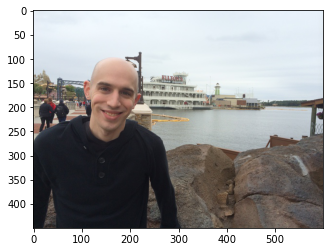

In [4]:
# show the image and wait for a keypress
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# save the image -- OpenCV handles converting filetypes
# automatically
cv2.imwrite("newimage.jpg", image)

True

In [ ]:
################################################################################
#
#       1.2 Image basics 
#
################################################################################

In [7]:
(h, w) = image.shape[:2]


# images are just NumPy arrays. The top-left pixel can be found at (0, 0)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b))

Pixel at (0, 0) - Red: 233, Green: 240, Blue: 246


In [8]:
# now, let's change the value of the pixel at (0, 0) and make it red
image[0, 0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b))

Pixel at (0, 0) - Red: 255, Green: 0, Blue: 0


In [9]:
# compute the center of the image, which is simply the width and height divided by two
(cX, cY) = (w // 2, h // 2)  # the // rounds down the result of the division

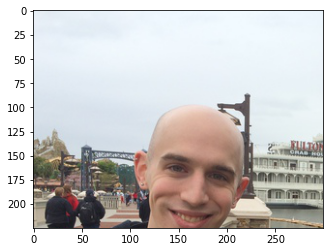

In [10]:

# since we are using NumPy arrays, we can apply slicing and grab large chunks
# of the image -- let's grab the top-left corner
tl = image[0:cY, 0:cX]
plt.imshow(cv2.cvtColor(tl, cv2.COLOR_BGR2RGB))
plt.show()


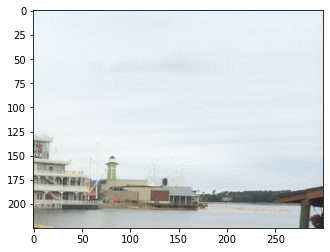

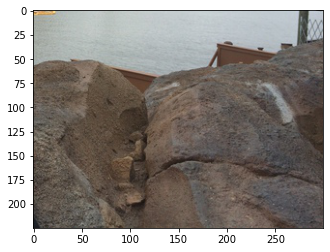

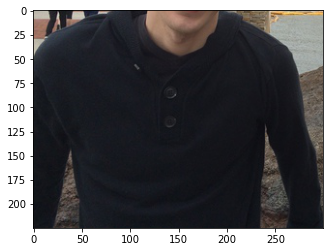

In [11]:

# in a similar fashion, let's grab the top-right, bottom-right, and bottom-left
# corners and display them
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]

plt.imshow(cv2.cvtColor(tr, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(br, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(bl, cv2.COLOR_BGR2RGB))
plt.show()


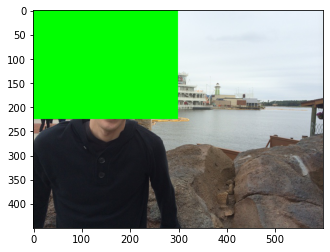

In [12]:

# now let's make the top-left corner of the original image green
image[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

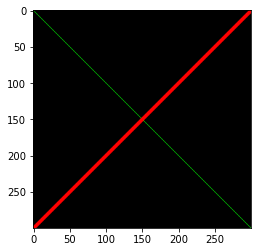

In [13]:
################################################################################
#
#       1.3 Drawing
#
################################################################################

import numpy as np

# initialize our canvas as a 300x300 with 3 channels, Red, Green,
# and Blue, with a black background
canvas = np.zeros((300, 300, 3), dtype="uint8")

# draw a green line from the top-left corner of our canvas to the bottom-right
green = (0, 255, 0)
blue  = (255, 0, 0)
red   = (0, 0, 255)

cv2.line(canvas, (0, 0), (300, 300), green)

# now, draw a 3 pixel thick red line from the top-right corner to the bottom-left

cv2.line(canvas, (300, 0), (0, 300), red, 3)

plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.show()

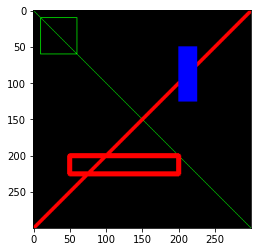

In [14]:
# draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green)

# draw another rectangle, this time we'll make it red and 5 pixels thick
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)

# let's draw one last rectangle: blue and filled in
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)

plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.show()

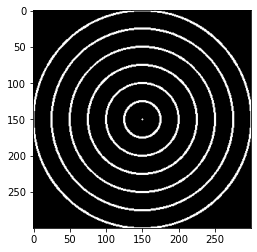

In [15]:
# reset our canvas and draw a white circle at the center of the canvas with
# increasing radii - from 25 pixels to 150 pixels
canvas = np.zeros((300, 300, 3), dtype="uint8")

(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)

white = (255, 255, 255)

for r in range(0, 175, 25):
	cv2.circle(canvas, (centerX, centerY), r, white ,2)

# show our work of art
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.show()

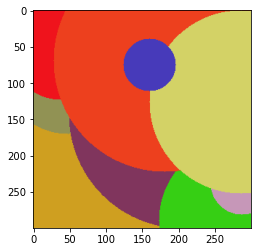

In [16]:
# let's go crazy and draw 25 random circles
for i in range(0, 25):
	# randomly generate a radius size between 5 and 200, generate a random
	# color, and then pick a random point on our canvas where the circle
	# will be drawn
	radius = np.random.randint(5, high=200)
	color  = np.random.randint(0, high=256, size = (3,)).tolist()
	pt     = np.random.randint(0, high=300, size = (2,))
	
  # draw our random circle
	cv2.circle(canvas, tuple(pt), radius, color, -1)
 
# Show our masterpiece
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.show()

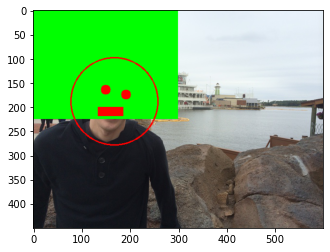

In [18]:
# draw a circle around my face, two filled in circles covering my eyes, and
# a rectangle surrounding my mouth
cv2.circle(image, (168, 188), 90, (0, 0, 255), 2)
cv2.circle(image, (150, 164), 10, (0, 0, 255), -1)
cv2.circle(image, (192, 174), 10, (0, 0, 255), -1)
cv2.rectangle(image, (134, 200), (186, 218), (0, 0, 255), -1)

# show the output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()